In [1]:
import pandas as pd

xls = pd.ExcelFile('companies_new.xlsx')
sheets = xls.sheet_names
sheet_to_df_map = {}
for sheet in sheets:
    sheet_to_df_map[sheet] = xls.parse(sheet)

df = pd.concat(sheet_to_df_map.values(), ignore_index=True)

In [2]:
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

In [3]:
df['Date'] = df['Date'].astype('datetime64[ns]')

In [4]:
df['COMP'].value_counts()

UNILEVER            1135
BMW                 1127
LUFTHANSA           1127
ZALANDO             1127
DELIVERY HERO       1127
DEUTSCHEBANK        1127
VOLKSWAGEN          1127
HENKEL              1127
HELLOFRESH          1117
SAP                 1116
ALLIANZ             1116
HUGO BOSS           1116
DEUTSCHE TELEKOM    1116
SIEMENS              992
BASF                 886
Name: COMP, dtype: int64

In [5]:
news = pd.read_csv('news_data.csv')

In [6]:
news = news[['just_date', 'message', 'COMP']].rename({'just_date': 'Date'}, axis = 'columns')

In [7]:
news['Date'] = news['Date'].astype('datetime64[ns]')

In [8]:
def func(x):
    res = x.upper() 
    if res == 'ZAL':
        return 'ZALANDO'
    else:
        return res

In [9]:
news['COMP'] = news['COMP'].apply(lambda x: func(x))

In [10]:
result = pd.merge(df, news, how="left", on=["COMP", "Date"])

In [11]:
result.message.notna().sum()

3661

In [12]:
result

,COMP,Date,Open,High,Low,Close,Volume,message
0,ALLIANZ,2019-02-22,79.96,81.35,79.80,81.23,423912,NaN
1,ALLIANZ,2019-02-25,81.76,82.67,81.72,82.41,540216,NaN
2,ALLIANZ,2019-02-26,82.25,83.16,82.16,82.68,327024,kurz vor dem gipfeltreffen: alle blicke sind a...
3,ALLIANZ,2019-02-27,82.43,83.53,82.07,83.27,366054,NaN
4,ALLIANZ,2019-02-28,82.05,82.06,81.07,81.81,519239,kommentar: die allianz der erzrivalen daimler ...
...,...,...,...,...,...,...,...,...
17655,ZALANDO,2023-07-24,30.75,31.25,30.28,30.82,1002680,NaN
17656,ZALANDO,2023-07-25,30.75,31.58,30.75,31.35,1146526,NaN
17657,ZALANDO,2023-07-26,31.05,31.85,30.45,30.72,825826,NaN
17658,ZALANDO,2023-07-27,30.45,32.17,30.45,31.35,980111,NaN


In [13]:
result.to_csv('final.csv')

In [14]:
result['COMP'].value_counts()

VOLKSWAGEN          1542
LUFTHANSA           1453
DEUTSCHEBANK        1357
ALLIANZ             1169
BMW                 1147
UNILEVER            1139
ZALANDO             1133
HENKEL              1133
DEUTSCHE TELEKOM    1131
DELIVERY HERO       1129
SAP                 1122
HELLOFRESH          1118
HUGO BOSS           1116
SIEMENS             1071
BASF                 900
Name: COMP, dtype: int64

## Sentiments from german Bert

In [15]:
pip install germansentiment

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [16]:
from germansentiment import SentimentModel

model = SentimentModel()

In [17]:
def sent(x):
    try:
        res = model.predict_sentiment(x)
    except:
        res = 0
    return res

In [18]:
##result['sentiment'] = result['message'].apply(lambda x: sent(x))

In [21]:
import numpy as np

In [22]:
result['index'] = result.index

In [28]:
indexes = np.array(result[result['message'].notna()]['index'])
texts = np.array(result[result['message'].notna()]['message'])

In [29]:
texts

array(['kurz vor dem gipfeltreffen: alle blicke sind auf vietnam gerichtet\n#kimjongun #peteraltmaier #donaldtrump #joekaeser #horstgeicke #siemens #isin_de0007236101\n\ndas gipfeltreffen zwischen trump und kim rückt das land ins scheinwerferlicht. die deutschen haben erkannt, wie wichtig der standort ist. berlin und brüssel schmieden allianzen mit den kommunisten in hanoi.\n\nteilen 👉 @dernewsbot faz444',
       'kommentar: die allianz der erzrivalen daimler und bmw ist richtig\n#daimler #bmw\n\ndie deutschen luxuswagenhersteller wollen gemeinsam das roboterauto entwickeln. das ist gut – nicht nur, weil zur konkurrenz auch google gehört. ein kommentar.\n\nteilen 👉 @dernewsbot faz663',
       'kommentar: die allianz der erzrivalen daimler und bmw ist richtig\n\ndie deutschen luxuswagenhersteller wollen gemeinsam das roboterauto entwickeln. das ist gut – nicht nur, weil zur konkurrenz auch google gehört. ein kommentar.\n\nteilen 👉 @dernewsbot faz656',
       ...,
       "\u200b\u200b\u2

In [30]:
import time

In [31]:

start_time = time.time()

result_list = model.predict_sentiment(texts)

end_time = time.time()

execution_time = end_time - start_time


# Print the execution time
print(f"Execution time: {execution_time} seconds")

Execution time: 3370.991641998291 seconds


In [37]:
len(indexes)

3661

In [46]:
np.vstack((indexes, np.array(result_list))).T

array(['2', '4', '5', ..., 'neutral', 'neutral', 'negative'], dtype='<U21')

In [50]:
df2 = pd.DataFrame(np.vstack((indexes, np.array(result_list))).T, columns = ['index', 'sentiment'])

In [51]:
df2

,index,sentiment
0,2,neutral
1,4,neutral
2,5,positive
3,6,neutral
4,7,negative
...,...,...
3656,17558,neutral
3657,17559,neutral
3658,17590,neutral
3659,17602,neutral


In [57]:
df2['index'] = df2['index'].astype('int64')

In [58]:
df_final = pd.merge(result, df2, how="left", on=["index"])

In [60]:
df_final.to_csv('with_sentiments.csv')

In [61]:
df_final['sentiment'].value_counts()

neutral     3331
negative     317
positive      13
Name: sentiment, dtype: int64

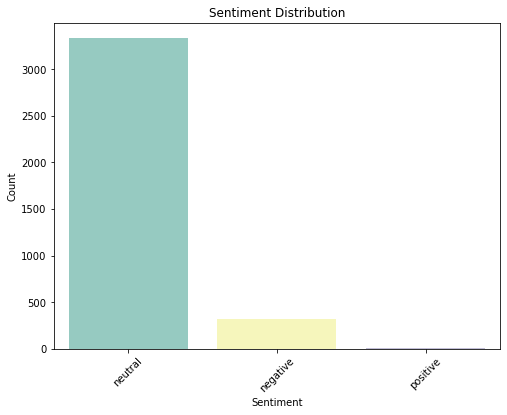

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have df_final with the 'sentiment' column

# Get the value counts of 'sentiment'
sentiment_counts = df_final['sentiment'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="Set3")
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()


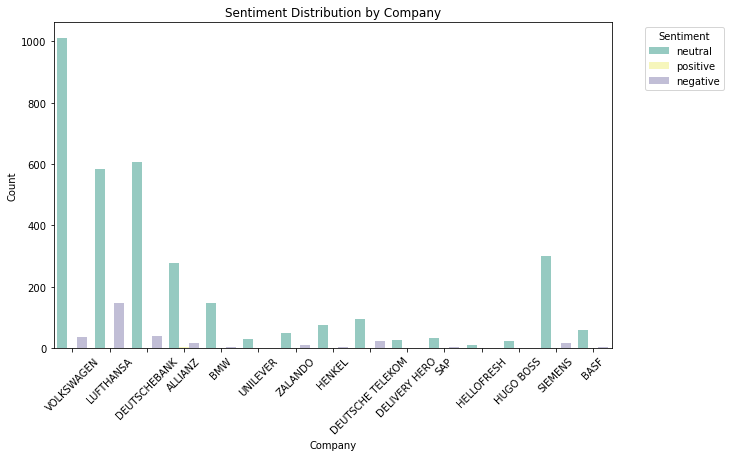

In [65]:
order = df_final['COMP'].value_counts().index

plt.figure(figsize=(10, 6))  # Optional: Set the figure size
sns.countplot(data=df_final, x='COMP', hue='sentiment', palette='Set3', order = order)
plt.title('Sentiment Distribution by Company')
plt.xlabel('Company')
plt.ylabel('Count')

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()





## so the predictions for the companies with huge amount of negative news may actually be better than without sentimental analysis

In [66]:
df_final

,COMP,Date,Open,High,Low,Close,Volume,message,index,sentiment
0,ALLIANZ,2019-02-22,79.96,81.35,79.80,81.23,423912,NaN,0,NaN
1,ALLIANZ,2019-02-25,81.76,82.67,81.72,82.41,540216,NaN,1,NaN
2,ALLIANZ,2019-02-26,82.25,83.16,82.16,82.68,327024,kurz vor dem gipfeltreffen: alle blicke sind a...,2,neutral
3,ALLIANZ,2019-02-27,82.43,83.53,82.07,83.27,366054,NaN,3,NaN
4,ALLIANZ,2019-02-28,82.05,82.06,81.07,81.81,519239,kommentar: die allianz der erzrivalen daimler ...,4,neutral
...,...,...,...,...,...,...,...,...,...,...
17655,ZALANDO,2023-07-24,30.75,31.25,30.28,30.82,1002680,NaN,17655,NaN
17656,ZALANDO,2023-07-25,30.75,31.58,30.75,31.35,1146526,NaN,17656,NaN
17657,ZALANDO,2023-07-26,31.05,31.85,30.45,30.72,825826,NaN,17657,NaN
17658,ZALANDO,2023-07-27,30.45,32.17,30.45,31.35,980111,NaN,17658,NaN
